In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 내국인 데이터

In [2]:
df = pd.read_table('C:/Users/user/python programming/공모전/NATIVE_re.txt',sep='|')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.columns =['거주지','17시 도', '시군구', '가맹점 대분류', '가맹점 소분류', '성별', '연령대', '이용년월', '요일', '이용 시간대', '취급액', '이용건수']

In [4]:
# df.describe()

In [5]:
# df.info()

In [6]:
# df.isna().sum()

- 결측치 처리

In [7]:
df = df.dropna(axis=0, how='any', inplace=False)

In [8]:
# df.isna().sum()

- 전처리

In [9]:
# df.head()

In [10]:
df[df['시군구']=='.'][['17시 도']].value_counts()

17시 도
세종       312524
dtype: int64

In [11]:
# df[df['시군구']=='.'][['17시 도']=='세종']='a'

condition1 = (df['시군구']=='.')
condition2 = (df['17시 도']=='세종')

df.loc[condition1 & condition2, ['시군구']] = '세종'

In [1]:
# df[df['17시 도']=='세종']

- 요일 한글로 바꾸기

In [13]:
condition1 = (df['요일']=='RED')
condition2 = (df['요일']=='WHITE')

In [14]:
df.loc[condition1, ['요일']] = '주말'
df.loc[condition2, ['요일']] = '평일'

- 성별 한글로 바꾸기

In [15]:
condition1 = (df['성별']=='M')
condition2 = (df['성별']=='F')

In [16]:
df.loc[condition1, ['성별']] = '여자'
df.loc[condition2, ['성별']] = '남자'

- 연령대 통일하기 (숫자랑 문자열이 같이 있음, 20이랑 '20' 묶어주기)

In [17]:
condition1 = (df['연령대']=='20')
condition2 = (df['연령대']=='30')
condition3 = (df['연령대']=='40')
condition4 = (df['연령대']=='50')
condition5 = (df['연령대']=='60')

In [18]:
df.loc[condition1,['연령대']]=20
df.loc[condition2,['연령대']]=30
df.loc[condition3,['연령대']]=40
df.loc[condition4,['연령대']]=50
df.loc[condition5,['연령대']]=60

In [19]:
df = df[df.연령대 !='기타']

In [20]:
df = df[df.연령대 !='.']

- 코로나 전후 컬럼 추가하기
- 2020년 기준으로 코로나 전후로 나눔

In [21]:
bins = [0, 202000, 202200]
year_names = ['코로나 전', '코로나 후']
df['코로나전후'] = pd.cut(df['이용년월'], bins, labels=year_names)

In [2]:
# df.head()

## 코로나 전후 전체적인 이용건수의 변화

<AxesSubplot:xlabel='이용년월'>

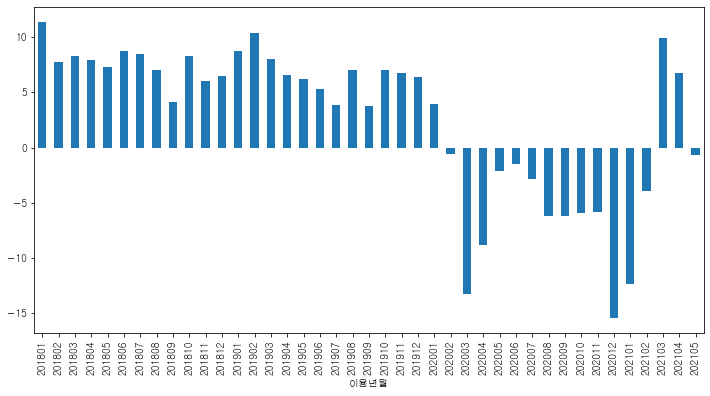

In [23]:
# 전년대비 변화
plt.figure(figsize=(12,6))
year = pd.DataFrame(df[['이용건수','취급액']].groupby(df['이용년월']).sum())
(year['이용건수'].pct_change(periods=12)[12:]*100).plot(kind='bar')

<AxesSubplot:xlabel='이용년월'>

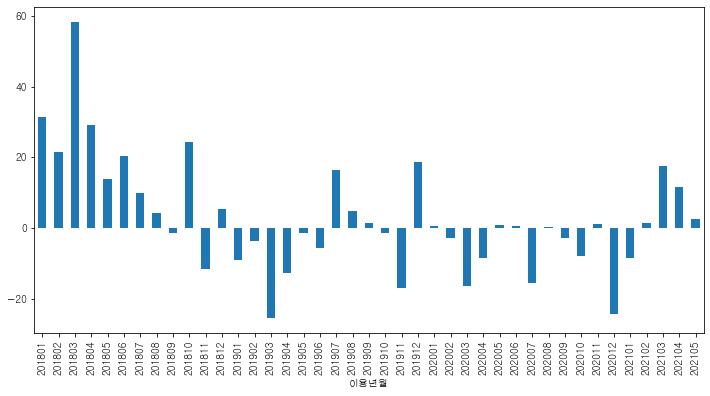

In [24]:
plt.figure(figsize=(12,6))
(year['취급액'].pct_change(periods=12)[12:]*100).plot(kind='bar')

## 시각화 (코로나 전후 비교)

### 연령대 별 코로나 전후 매출 비교

<AxesSubplot:xlabel='연령대,코로나전후'>

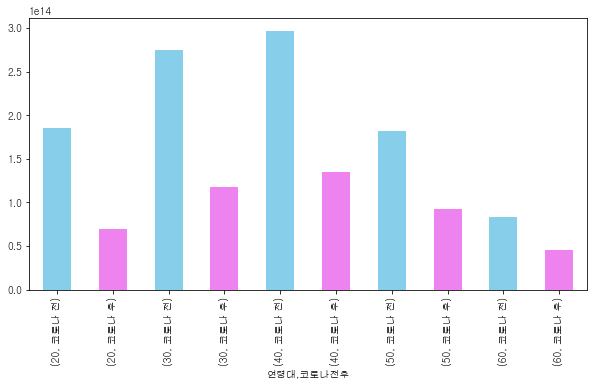

In [25]:
plt.figure(figsize=(10,5))
colors = ['skyblue','violet']
year_covid=df['취급액'].groupby([df['연령대'], df['코로나전후']]).sum()
year_covid.plot(kind='bar', color=colors)

- 모든 연령대에서 취급액 감소

### 지역 별 코로나 전후 매출 비교

In [26]:
use = {}
amount = {}
amount_per_use = {}

for i in df['17시 도'].unique().tolist():
    tem = df[df['17시 도']==i]
    tem['건당취급액'] = tem['취급액']/ tem['이용건수']
    tmp = pd.DataFrame(tem[['이용건수','취급액','건당취급액']].groupby(tem['이용년월']).sum())
    
    t = tmp['이용건수'].pct_change(periods=12)[12:]*100
    use[i] = t
    
    t = tmp['취급액'].pct_change(periods=12)[12:]*100
    amount[i] = t
    
    t = tmp['건당취급액'].pct_change(periods=12)[12:]*100
    amount_per_use[i] = t

<ipython-input-26-798f2b4280d8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem['건당취급액'] = tem['취급액']/ tem['이용건수']


In [27]:
use = pd.DataFrame(use)
amount = pd.DataFrame(amount)
amount_per_use = pd.DataFrame(amount_per_use)

In [28]:
CovidChangeUse = use[24:].mean().sort_values(ascending=False)
CovidChangeAmount = amount[24:].mean().sort_values(ascending=False)
CovidChangeAPU = amount_per_use[24:].mean().sort_values(ascending=False)

<AxesSubplot:>

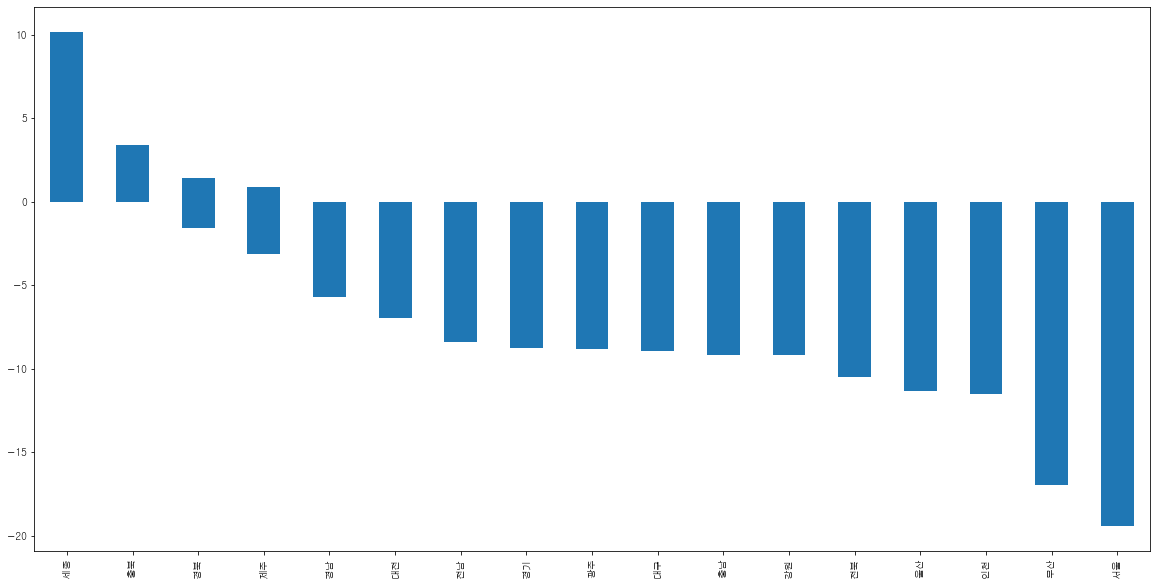

In [29]:
plt.rcParams["figure.figsize"] = (20,10)

CovidChangeUse.plot(kind='bar')
CovidChangeAmount.plot(kind='bar')
CovidChangeAPU.plot(kind='bar')

### 가맹점 소분류 별 코로나 전후 매출 비교

In [30]:
df['가맹점 소분류'].unique()

array(['외식', '종합쇼핑', '미용', '패션쇼핑', '스포츠용품구매', '레저스포츠', '숙박', '목욕', '유흥',
       '교육훈련', '독서', '인터넷게임', '교통', '애완동물돌보기', '관광쇼핑', '골프', '사진촬영',
       '공연관람', '자전거', '여행사', '헬스', '체험', '종교활동', '음악감상', '미술공예참여', '악기연주',
       '스키', '운동경기관람'], dtype=object)

In [31]:
use = {}
amount = {}
amount_per_use = {}

for i in df['가맹점 소분류'].unique().tolist():
    tem = df[df['가맹점 소분류']==i]
    tem['건당취급액'] = tem['취급액']/ tem['이용건수']
    tmp = pd.DataFrame(tem[['이용건수','취급액','건당취급액']].groupby(tem['이용년월']).sum())
    
    t = tmp['이용건수'].pct_change(periods=12)[12:]*100
    use[i] = t
    
    t = tmp['취급액'].pct_change(periods=12)[12:]*100
    amount[i] = t
    
    t = tmp['건당취급액'].pct_change(periods=12)[12:]*100
    amount_per_use[i] = t

<ipython-input-31-e67a878a2560>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem['건당취급액'] = tem['취급액']/ tem['이용건수']


In [32]:
use = pd.DataFrame(use)
amount = pd.DataFrame(amount)
amount_per_use = pd.DataFrame(amount_per_use)

In [33]:
CovidChangeUse = use[24:].mean().sort_values(ascending=False)
CovidChangeAmount = amount[24:].mean().sort_values(ascending=False)
CovidChangeAPU = amount_per_use[24:].mean().sort_values(ascending=False)

<AxesSubplot:>

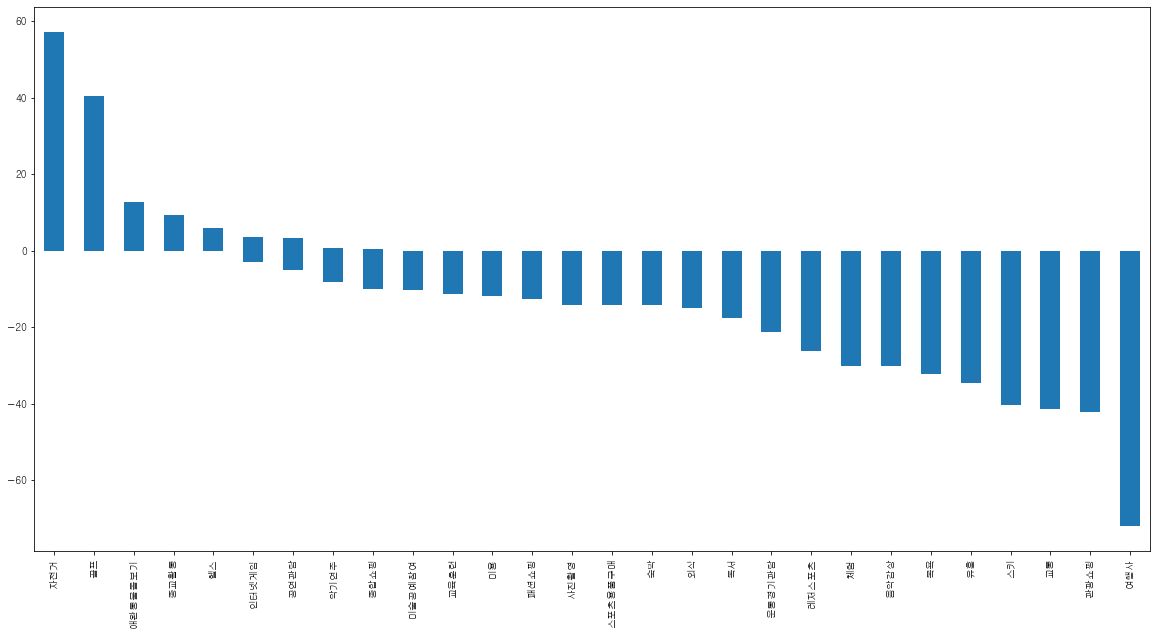

In [34]:
plt.rcParams["figure.figsize"] = (20,10)

CovidChangeUse.plot(kind='bar')
CovidChangeAmount.plot(kind='bar')
CovidChangeAPU.plot(kind='bar')

## EDA

- 전년대비 소비가 증가한 다섯가지
    - 자전거: 실외활동 (일상에서 흔히  이용할 수 있는 활동)
    - 골프: 실외활동 (사람들 간의 거리가 먼 스포츠)
    - 애완동물 돌보기: 집에 있는 시간이 증가함에 따라 반려동물에 대한 수요 증가
    - 종교활동: 온라인 활동으로 인한 증가로 보여짐(언택트)
    - 인터넷 게임: 외부 대면 활동을 못하기 때문에 비대면 활동인 게임에 대한 수요 증가(언택트)

- 건당 취급액으로 보면 헬스, 공연관람, 악기연주, 종합쇼핑, 교육훈련 까지도 소비가 증가함

In [35]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [36]:
display_side_by_side(pd.DataFrame(CovidChangeUse, columns=['이용건수']), pd.DataFrame(CovidChangeAmount, columns=['취급액']), pd.DataFrame(CovidChangeAPU, columns=['건당취급액']))

,이용건수
자전거,25.775334
골프,10.700710
종합쇼핑,8.763514
종교활동,6.402491
애완동물돌보기,3.732942
교육훈련,-2.833828
체험,-4.961778
사진촬영,-8.128678
미술공예참여,-10.025936
스포츠용품구매,-10.126161


In [38]:
bike = df.loc[df['가맹점 소분류']=='자전거',['이용년월','17시 도', '거주지', '취급액', '이용건수', '성별', '연령대',
       '요일', '이용 시간대']]

bike.reset_index(drop=True, inplace=True)
bike_multi = bike.set_index(['17시 도','이용년월']).sort_index()
bike_multi

거주지      취급액  이용건수  성별 연령대  요일 이용 시간대
17시 도 이용년월                                        
강원    201701  강원   278400     4  남자  30  평일     휴식
      201701  강원   222720     4  여자  50  주말     활동
      201701  강원  1206400     4  여자  40  평일     휴식
      201701  경기    48720     4  여자  50  주말     활동
      201701  서울   139200     4  여자  60  주말     활동
...           ..      ...   ...  ..  ..  ..    ...
충북    202105  충북  1679700    25  여자  30  주말     활동
      202105  서울    50900     5  여자  50  평일     활동
      202105  충북  9538660   127  남자  50  평일     활동
      202105  충북  5624450    30  여자  30  평일     활동
      202105  충북   432650    15  여자  40  평일     활동

[348600 rows x 7 columns]

<AxesSubplot:xlabel='이용년월'>

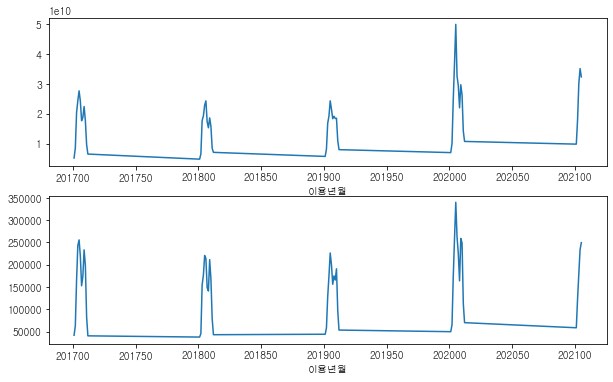

In [39]:
f, ax = plt.subplots(figsize = (10, 6)) 

plt.subplot(211)
bike_multi.sum(level='이용년월')['취급액'].plot()

plt.subplot(212)
bike_multi.sum(level='이용년월')['이용건수'].plot()

- 전체적인 매출, 이용건수의 증가 추이 -> 코로나 이후 변화가 뚜렷한 것으로 파악

### 2021년 이후 가장 빠르게 회복되고 있는 카테고리 찾아보기

In [43]:
NewNormalUse = use[36:].T
UseRank = use[36:].mean().sort_values(ascending=False).index.tolist()
NewNormalUse.reindex(UseRank).head(10)

이용년월,202101,202102,202103,202104,202105
체험,-53.597710,129.694359,133.823039,76.249155,40.029652
관광쇼핑,-74.361087,-13.473517,110.102920,157.061998,60.587320
사진촬영,-24.585484,28.758567,79.896153,56.767186,63.595863
미술공예참여,-30.636833,25.986760,73.101197,43.226271,24.578003
교육훈련,-17.478527,8.735889,87.120414,28.354335,8.876187
공연관람,-74.769694,-28.388829,48.916572,119.393675,48.269652
종교활동,-23.147142,45.444014,36.007406,21.649252,14.928082
교통,-47.240815,-4.666139,83.404389,37.296234,11.626906
헬스,-56.036712,-5.401657,77.165398,47.503930,13.752531
자전거,17.735279,89.726922,3.363443,-9.560723,-26.649230


In [44]:
NewNormalAmount = amount[36:].T
AmountRank = amount[36:].mean().sort_values(ascending=False).index.tolist()
NewNormalAmount.reindex(amount[36:].mean().sort_values(ascending=False).index.tolist()).head(10)

이용년월,202101,202102,202103,202104,202105
관광쇼핑,-76.198925,-26.972967,134.486853,222.736678,79.260276
공연관람,-7.458941,21.921755,101.135269,122.393146,71.327383
체험,-53.310850,78.445103,117.053869,96.273374,37.957899
골프,69.677603,44.627080,40.453681,24.240494,14.414709
헬스,-47.590037,6.437275,136.728384,64.651828,15.512372
숙박,-37.674609,5.609943,62.515964,59.418564,30.175128
자전거,40.526241,80.588139,21.340300,-4.783881,-35.233797
교육훈련,-14.998154,4.001342,78.585686,21.321526,4.773459
미술공예참여,-13.226246,4.367154,52.282482,20.406626,25.414078
종교활동,-6.886912,10.878522,50.106876,8.224519,24.385261


In [45]:
NewNormalAPU = amount_per_use[36:].T
ApuRank = amount_per_use[36:].mean().sort_values(ascending=False).index.tolist()
NewNormalAPU.reindex(ApuRank).head(10)

이용년월,202101,202102,202103,202104,202105
공연관람,34.230936,17.919491,55.071909,45.842802,37.351124
골프,49.162483,17.330742,38.304295,28.545640,15.324001
헬스,-11.209564,-0.024538,65.038830,30.164762,8.724148
자전거,26.031808,24.098856,27.867002,11.429722,-17.519825
애완동물돌보기,19.107936,-1.764672,19.000345,14.533753,13.955412
관광쇼핑,-47.048206,-23.795733,28.820798,64.763886,27.790496
사진촬영,-3.592203,-14.963661,27.622138,34.756478,4.340384
숙박,-20.995182,-12.420780,26.371727,37.262732,8.367453
체험,-32.691322,-12.172641,36.441028,33.914309,11.107385
교육훈련,2.006698,-14.339899,29.043486,15.367705,2.306186


In [46]:
Rank = {}

Rank['UseRank'] = UseRank
Rank['AmountRank'] = AmountRank
Rank['ApuRank'] = ApuRank

pd.DataFrame(Rank).head(10)

,UseRank,AmountRank,ApuRank
0,체험,관광쇼핑,공연관람
1,관광쇼핑,공연관람,골프
2,사진촬영,체험,헬스
3,미술공예참여,골프,자전거
4,교육훈련,헬스,애완동물돌보기
5,공연관람,숙박,관광쇼핑
6,종교활동,자전거,사진촬영
7,교통,교육훈련,숙박
8,헬스,미술공예참여,체험
9,자전거,종교활동,교육훈련


- 코로나가 장기화되면서 소비가 증가하고 있는 카테고리들의 순위
- 코로나가 지속되면서 생기는 새로운 형태의 소비 업종들로서 뉴노멀 업종 트렌드로 볼 수 있음

- 결론
    - 체험, 관광에 대한 욕구는 가득하지만, 코로나로 인한 불안감으로 조심하는 상황
    - 이전과 다른 새로운 변화에 적응을 하며 나타는 뉴노멀 트랜드: 언택트(온라인), 자전거

# 외국인데이터

In [47]:
f_df = pd.read_table('C:/Users/user/python programming/공모전/FOREIGNER.txt',sep='|')
f_df.columns=['국적', '17시 도', '시군구', '가맹점 대분류', '가맹점 소분류', '이용년월', '요일', '이용 시간대', '취급액', '이용건수','거주지']

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
f_df = f_df.reindex(columns=['국적','거주지', '17시 도', '시군구', '가맹점 대분류', '가맹점 소분류', '이용년월', '요일', '이용 시간대', '취급액', '이용건수'])

## 전처리

In [49]:
# f_df.isna().sum()

- 거주지와 시군구에 결측치가 존재하지만, 제거하기에는 데이터의 양이 너무 많고, 내국인 데이터와 비슷하게 분석할 것이기 때문에(해당 컬럼 필요없음) 결측치 처리하지 않고 그대로 진행 

## 코로나 전후 이용건수, 취급액 비교

<AxesSubplot:xlabel='이용년월'>

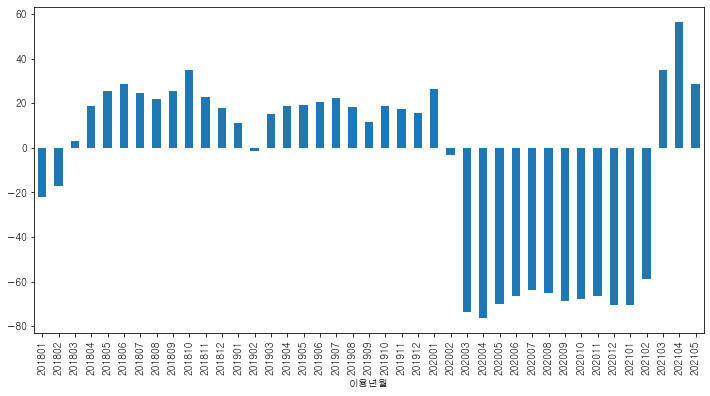

In [50]:
plt.figure(figsize=(12,6))
year = pd.DataFrame(f_df[['이용건수','취급액']].groupby(f_df['이용년월']).sum())
(year['이용건수'].pct_change(periods=12)[12:]*100).plot(kind='bar')

<AxesSubplot:xlabel='이용년월'>

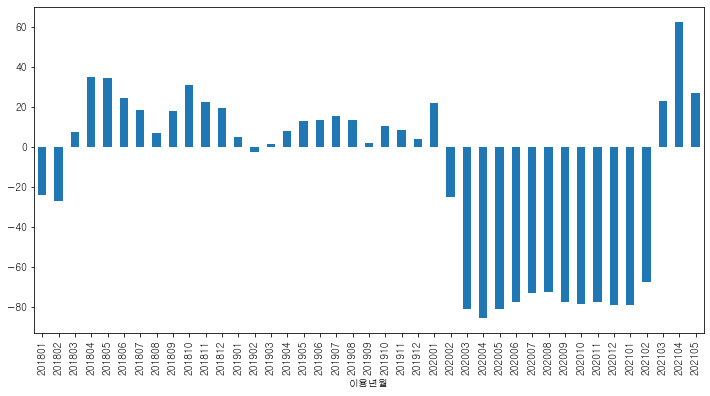

In [51]:
plt.figure(figsize=(12,6))
(year['취급액'].pct_change(periods=12)[12:]*100).plot(kind='bar')

## 시각화(코로나 전후 비교)

### 국가 별 코로나 전후 취급액

In [52]:
use = {}
amount = {}
amount_per_use = {}

for i in f_df['국적'].unique().tolist():
    tem = f_df[f_df['국적']==i]
    tem['건당취급액'] = tem['취급액']/ tem['이용건수']
    tmp = pd.DataFrame(tem[['이용건수','취급액','건당취급액']].groupby(tem['이용년월']).sum())
    
    t = tmp['이용건수'].pct_change(periods=12)[12:]*100
    use[i] = t
    
    t = tmp['취급액'].pct_change(periods=12)[12:]*100
    amount[i] = t
    
    t = tmp['건당취급액'].pct_change(periods=12)[12:]*100
    amount_per_use[i] = t

<ipython-input-52-6a1037b1ce12>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem['건당취급액'] = tem['취급액']/ tem['이용건수']


In [53]:
use = pd.DataFrame(use)
amount = pd.DataFrame(amount)
amount_per_use = pd.DataFrame(amount_per_use)

In [54]:
CovidChangeUse = use[24:].mean().sort_values(ascending=False)
CovidChangeAmount = amount[24:].mean().sort_values(ascending=False)
CovidChangeAPU = amount_per_use[24:].mean().sort_values(ascending=False)

<AxesSubplot:>

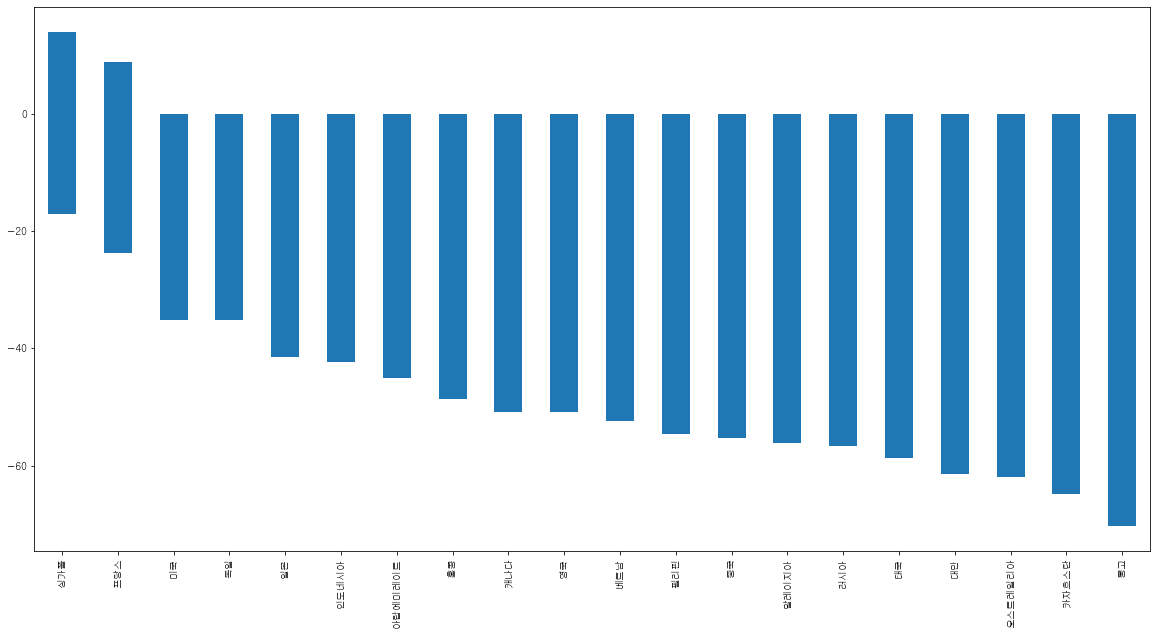

In [55]:
plt.rcParams["figure.figsize"] = (20,10)

CovidChangeUse.plot(kind='bar')
CovidChangeAmount.plot(kind='bar')
CovidChangeAPU.plot(kind='bar')

### 가맹점 소분류 별 코로나 전후 취급액 비교

In [56]:
f_df['가맹점 소분류'].unique()

array(['기타지출', '스포츠센타/레포츠클럽', '피부미용', '기타', '개인병원', '산후조리원', '종합병원',
       '할인점/편의점', '기타쇼핑', '약국', '한식외', '관광여행사', '의류잡화', '레저스포츠', '화장품',
       '테니스장', '수중장비', '그외숙박', '보트판매', '유흥', '관광상품', '수영장', '종합레저타운/놀이동산',
       '음료제과', '수련원,체험장', '스키장', '가전전자제품', '실외골프장', '1급2급호텔', '실내골프장',
       '보건소', '동물농장', '특급호텔', '이용,미용', '수족관', '응급실운영  병원', '볼링장', '목욕시설',
       '공연장,극장', '쇼핑몰', '오락시설', '면세점', '접골원', '의료기기,건강진단', '백화점', '한식',
       '운동경기관람', '당구장', '한의원,한약방', '치과병원', '자전거(성인용)'], dtype=object)

In [57]:
use = {}
amount = {}
amount_per_use = {}

for i in f_df['가맹점 소분류'].unique().tolist():
    tem = f_df[f_df['가맹점 소분류']==i]
    tem['건당취급액'] = tem['취급액']/ tem['이용건수']
    tmp = pd.DataFrame(tem[['이용건수','취급액','건당취급액']].groupby(tem['이용년월']).sum())
    
    t = tmp['이용건수'].pct_change(periods=12)[12:]*100
    use[i] = t
    
    t = tmp['취급액'].pct_change(periods=12)[12:]*100
    amount[i] = t
    
    t = tmp['건당취급액'].pct_change(periods=12)[12:]*100
    amount_per_use[i] = t

<ipython-input-57-c691268a7132>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tem['건당취급액'] = tem['취급액']/ tem['이용건수']


In [58]:
use = pd.DataFrame(use)
amount = pd.DataFrame(amount)
amount_per_use = pd.DataFrame(amount_per_use)

In [60]:
CovidChangeUse = use[24:].mean().sort_values(ascending=False)
CovidChangeAmount = amount[24:].mean().sort_values(ascending=False)
CovidChangeAPU = amount_per_use[24:].mean().sort_values(ascending=False)

<AxesSubplot:>

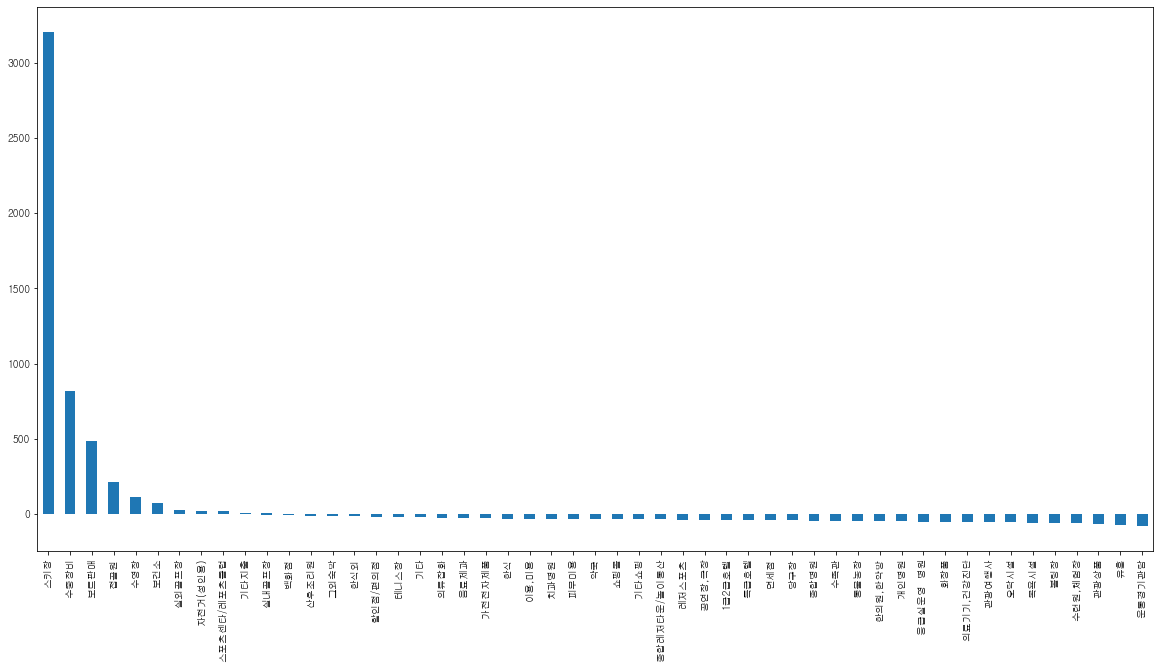

In [61]:
plt.rcParams["figure.figsize"] = (20,10)

CovidChangeUse.plot(kind='bar')
CovidChangeAmount.plot(kind='bar')
CovidChangeAPU.plot(kind='bar')

- 스키장에 대한 외국인의 사랑을 확인할 수 있었다..